In [62]:
# library imports
import scipy.stats as st
from scipy.stats import chisquare
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from dateutil import parser
# custom imports
from utils.sentimentAnalysis import SentimentAnalyzer

# Preparing the data for hypothesis tests

## Data prep

In [8]:
data = pd.read_csv('sampleData/finaldataset.csv')
head = data.head()
head

,Unnamed: 0,review_id,user_id,business_id,useful,funny,stars,cool,text,date,influencer
0,5977,3XZ0_xt5bP1kD58Xi4hRxQ,hWDybu_KvYLSdEFzGrniTw,dXCZXOlks37U7IVXepcBDA,12,7,3.0,9,I almost wish that I had a picnic basket and a...,2017-04-19 14:19:30,1
1,6037,9PFcEyPcwOMJX9xEctMPLA,hWDybu_KvYLSdEFzGrniTw,l_kefVF1frmC0xRW2YkvUA,2,4,2.0,1,Young hotties all around and a racket loud eno...,2012-03-01 15:09:45,1
2,9550,JMh-VnxC1zkZLZAGOJI7Ag,hWDybu_KvYLSdEFzGrniTw,42DvUONuqa1mC1YbnZ0o0w,4,4,3.0,3,New new new Taco Bell on South Tryon a little ...,2015-05-26 13:38:53,1
3,10115,n4rdRnngI96I0k2ifN_Zxw,Hi10sGSZNxQH3NLyWSZ1oA,hcFSc0OHgZJybnjQBrL_8Q,28,24,4.0,25,"If you want breakfast food, go to Eggyday Nood...",2017-03-15 21:46:36,1
4,10473,zUxl5xVaTPrKthmk0DwuVw,hWDybu_KvYLSdEFzGrniTw,OqJtHcr5AsyuIjd2ePqLzw,2,2,4.0,2,Tasty food and large portions in this strip ma...,2013-06-24 16:06:01,1


In [9]:
# cleaning: drop first col
data.columns
data = data.drop(['Unnamed: 0'], axis=1)
data.head()

,review_id,user_id,business_id,useful,funny,stars,cool,text,date,influencer
0,3XZ0_xt5bP1kD58Xi4hRxQ,hWDybu_KvYLSdEFzGrniTw,dXCZXOlks37U7IVXepcBDA,12,7,3.0,9,I almost wish that I had a picnic basket and a...,2017-04-19 14:19:30,1
1,9PFcEyPcwOMJX9xEctMPLA,hWDybu_KvYLSdEFzGrniTw,l_kefVF1frmC0xRW2YkvUA,2,4,2.0,1,Young hotties all around and a racket loud eno...,2012-03-01 15:09:45,1
2,JMh-VnxC1zkZLZAGOJI7Ag,hWDybu_KvYLSdEFzGrniTw,42DvUONuqa1mC1YbnZ0o0w,4,4,3.0,3,New new new Taco Bell on South Tryon a little ...,2015-05-26 13:38:53,1
3,n4rdRnngI96I0k2ifN_Zxw,Hi10sGSZNxQH3NLyWSZ1oA,hcFSc0OHgZJybnjQBrL_8Q,28,24,4.0,25,"If you want breakfast food, go to Eggyday Nood...",2017-03-15 21:46:36,1
4,zUxl5xVaTPrKthmk0DwuVw,hWDybu_KvYLSdEFzGrniTw,OqJtHcr5AsyuIjd2ePqLzw,2,2,4.0,2,Tasty food and large portions in this strip ma...,2013-06-24 16:06:01,1


In [10]:
# converting the dates to `datetime` objects (timestamps)
data['date'] = data['date'].apply(parser.parse)
# for seeing the types quickly
data.dtypes

review_id              object
user_id                object
business_id            object
useful                  int64
funny                   int64
stars                 float64
cool                    int64
text                   object
date           datetime64[ns]
influencer              int64
dtype: object

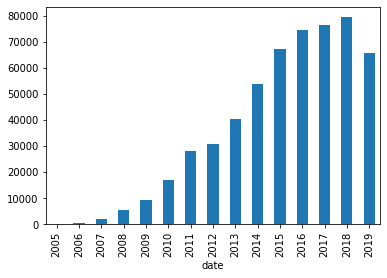

In [11]:
# Visualise the reviews timestamps
r = data['date'].groupby(data['date'].dt.year).count()
r.plot(kind='bar')

## grouping data by restraunts (`business_id`)

In [12]:
# number of reviews for each restraunt
data['business_id'].groupby(data['business_id']).count()

business_id
--9e1ONYQuAa-CB_Rrw7Tw    1816
-1UMR00eXtwaeh59pEiDjA     509
-2pQf1ceDZyE2ReCNbj-3A      78
-2pmn-oTJeybmDrL-ojwrw      25
-4TMQnQJW1yd6NqGRDvAeA     421
                          ... 
zkhBU5qW_zCy0q4OEtIrsA     324
zkwuRqXWEfHniSHbxbdfuQ      22
zmoQ2eIDyeKlKVGA8p9esQ      67
zsQk990PubOHjr1YcLkQFw     264
zsdcQyNJRP553oHEItm1iQ       9
Name: business_id, Length: 1553, dtype: int64

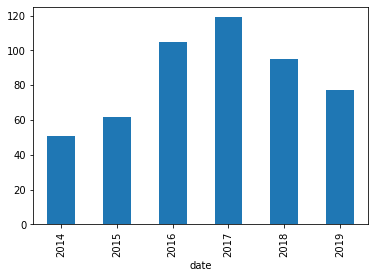

In [13]:
# the years in which this restraunt got reviews
res = '-1UMR00eXtwaeh59pEiDjA' # for example
res_data = data[data['business_id']==res]
r = res_data['date'].groupby(res_data['date'].dt.year).count()
r.plot(kind='bar')


In [14]:
# 'influencers' at this restraunt
res_data['user_id'][res_data['influencer']==1]

1260    ITa3vh5ERI90G_WP4SmGUQ
Name: user_id, dtype: object

In [15]:
inf = 'ITa3vh5ERI90G_WP4SmGUQ'
review_text = res_data['text'][res_data['user_id']==inf].iloc[0]
review_time = res_data['date'][res_data['user_id']==inf].iloc[0]
print(review_text)

Bad Decisions I've Made in 2017:

1. Picking up a skillet fresh out of the oven with my bare hand.
2. Believing the NY Giants were going to win.
3. Leaning into the trunk of a cab too early, and gashing my head on the rebounding door.

Good Decisions I've Made in 2017:

1. Getting the Sonrisa Burrito before I got on a plane back to NYC.

(Clearly killing it this year.)

Admittedly, my Phoenix airport eatery experience is a bit limited, but after drinking liquor of questionable quality until the wee hours of the morning, this burrito quite possibly saved my life. 

Although the menu only lists bacon and sausage as meat options, chorizo was a nice surprise choice. Beware, it's going to take 15 minutes for this thing because it's real food, and they have to grill the burrito. Which is so, so worth it, even if you have to miss your flight and live in PHX for the rest of your life.

Well, maybe not then.


In [16]:
# analyze it's sentiment
sa = SentimentAnalyzer()
score = sa.getScore(review_text)
print('sentiment is ', max(score, key=score.get))

sentiment is  pos


In [42]:
max_future_date = max(res_data['date'][res_data['date'].between(review_time, pd.Timestamp.max)])
future_delta = max_future_date - review_time
interval_days = future_delta.days if future_delta.days<20 else 20
print(f'interval days: {interval_days}')
# print(review_time)
lower = review_time - timedelta(days=interval_days)
upper = review_time + timedelta(days=interval_days)
# # upper = review_time + datetime.max # as into the future as we can go, to capture frequency
# # res_data[(review_time - res_data['date']) < pd.Timedelta(30, unit='days') ]
after_data = res_data[res_data['date'].between(review_time, upper)]
before_data = res_data[res_data['date'].between(lower,review_time) ]

print(f'before num: {len(before_data)}')
print(f'after num: {len(after_data)}')


interval days: 20
before num: 7
after num: 8


# Setting up the hypothesis tests
#### Test 
- increase in the frequency of review posts for a positive review posted by an influencer
- decrease in the frequency of review posts for a negative review posted by an influencer
#### change in the frequency test
The null hypothesis again represents the "no change" or "no difference" situation
- Null hyp: No change in the frequency
- Alt hyp: There is an change in the frequency. The nature of the change can be determined by the actual numeric values itself

([citation](https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717_ComparingFrequencies/PH717_ComparingFrequencies_print.html))

In [52]:
beforeNum = len(before_data)
afterNum = len(after_data)

alpha = 0.05

[7, 8]

In [61]:

testResult = chisquare([beforeNum, afterNum])
pValue = testResult.pvalue

In [60]:
if pValue < alpha :
    print('null rejected')
    if (afterNum>=beforeNum):
        print('Increase in frequency')
    if (afterNum<beforeNum):
        print('Decrease in frequency')
else : 
    print('cannot reject null\nNo change in review frequency')



null rejected
Increase in frequency


# Conducting test for every review of every influencer

## Wrapping what we did above in a function

In [68]:
sa = SentimentAnalyzer()
def does_cause_change(restraunt_data, influencer_id:str) -> dict:
    infuencer_data_in_res = res_data[res_data['user_id']==inf]
    reviews = infuencer_data_in_res['text']
    times = infuencer_data_in_res['date']
    reviewIds = infuencer_data_in_res['review_id']
    for index in range(len(reviews)):
        print('-'*15)
        review_id = reviewIds.iloc[index]
        review_text = reviews.iloc[index]
        review_time = times.iloc[index]
        # sentiment
        score = sa.getScore(review_text)
        sentiment :str = max(score, key=score.get)
        # getting info for hypothesis tests
        max_future_date = max(restraunt_data['date'][restraunt_data['date'].between(review_time, pd.Timestamp.max)])
        future_delta = max_future_date - review_time
        interval_days = future_delta.days if future_delta.days<20 else 20
        print(f'interval days: {interval_days}')
        lower = review_time - timedelta(days=interval_days)
        upper = review_time + timedelta(days=interval_days)
        after_data = restraunt_data[restraunt_data['date'].between(review_time, upper)]
        before_data = restraunt_data[restraunt_data['date'].between(lower,review_time) ]
        print(f'before num: {len(before_data)}')
        print(f'after num: {len(after_data)}')
        # conducting hypothesis test
        beforeNum = len(before_data)
        afterNum = len(after_data)
        alpha = 0.05
        testResult = chisquare([beforeNum, afterNum])
        pValue = testResult.pvalue
        obj =  {
            'reviewId':review_id,
            'change':pValue < alpha,
            'increase': afterNum > beforeNum
        }
        print(obj)




In [69]:
does_cause_change(res_data, inf)

---------------
interval days: 20
before num: 7
after num: 8
{'reviewId': 'ffmZ0SEdNeibq_Dh5enJIA', 'change': False, 'increase': True}


## doing it for all restraunts and influencers for that restraunt

In [76]:
restraunts = data['business_id'].groupby(data['business_id']).count()
restraunts
for rest_id in restraunts.index:
    # print(f'for restraunt {rest_id}')
    res_data = data[data['business_id']==rest_id]
    for influencer_id in res_data['user_id'][res_data['influencer']==1]:
        does_cause_change(res_data, influencer_id)


---------------
interval days: 20
before num: 7
after num: 8
{'reviewId': 'ffmZ0SEdNeibq_Dh5enJIA', 'change': False, 'increase': True}
---------------
interval days: 20
before num: 11
after num: 11
{'reviewId': 'lCVfPiw48qHWpD-89xeetA', 'change': False, 'increase': False}
---------------
interval days: 20
before num: 3
after num: 2
{'reviewId': 'm2y8RZazNpwPHA8YM020GA', 'change': False, 'increase': False}
---------------
interval days: 20
before num: 4
after num: 2
{'reviewId': 'DDl7RzUhp_925UemgsiLgg', 'change': False, 'increase': False}
---------------
interval days: 20
before num: 3
after num: 3
{'reviewId': 's7pZPcD-UU6CG-gjvQ0FCg', 'change': False, 'increase': False}
---------------
interval days: 20
before num: 7
after num: 4
{'reviewId': '-hanM-PZntdByHO8vMVCSg', 'change': False, 'increase': False}
---------------
interval days: 20
before num: 4
after num: 1
{'reviewId': 'Qhj1HPP7Gk91bPgPxJ-j9A', 'change': False, 'increase': False}
---------------
interval days: 20
before num: 1

In [77]:
# For the review which causes a significant change in traffic
reviewId = '9UmwiUBKNPG3vdyn2-Lvbg'
data[data['review_id']==reviewId]

,review_id,user_id,business_id,useful,funny,stars,cool,text,date,influencer
478,9UmwiUBKNPG3vdyn2-Lvbg,ITa3vh5ERI90G_WP4SmGUQ,qLy2F9EzCsFYIKd40OJvZA,14,3,3.0,4,This brand new steakhouse is a sleek and styli...,2017-10-26 15:37:59,1


## Conclusions and final words based on the results/output above
According to the output above, there is only _one_ review by who we consider an influencer, that causes a significant change in the number of reviews after it was posted.

Some reasons that explain the output above could be as follows:
- Our hypothesis/notions is actually untrue. This could be because in reality, the usefulness of a review (which we use to select an influencer) actually does not have an impact on the traffic to the restraunt in most cases.
- The traffic to the restraunt could be influenced by other factors, and not just the reviews.
- Our technique of sampling was incorrect.
- Our technique of identifying and tagging influencers was incorrect.